**DELETE FOLDER(JIKA DIPERLUKAN)**

In [ ]:
import shutil

# Tentukan path folder yang ingin dihapus
folder_path = '/path/to/folder'

# Hapus folder beserta isinya secara paksa
shutil.rmtree(folder_path)

print(f"Folder {folder_path} telah dihapus.")

**IMPORT LIBRARY YANG DIPERLUKAN**

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**MENGUNDUH DAN MENYIAPKAN DATASET**

In [ ]:
!git clone https://github.com/RenoTxT/CNN_Vocal_Word.git

Cloning into 'CNN_Vocal_Word'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 239 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (239/239), 452.66 KiB | 4.11 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
# Tentukan path ke folder dataset
base_path = './CNN_Vocal_Word'
labels = ["A", "I", "U", "E", "O", "a_lower", "i_lower", "u_lower", "e_lower", "o_lower"]

# Parameter
img_size = 28  # Ukuran gambar

**TRAIN DATA DIMULAI**

Mengimpor Dataset dan Mengubah Gambar ke Grayscale serta Normalisasi

In [ ]:
# Load Dataset
data = []
target = []

# Loop untuk setiap label huruf vokal (A, I, U, E, O, a, i, u, e, o)
for label in labels:
    folder_path = os.path.join(base_path, label)  # Path ke folder untuk huruf besar/kecil
    label_index = labels.index(label)  # Menentukan indeks label (0 untuk A, 1 untuk I, dll)

    # Loop untuk membaca gambar 1 sampai 5 di setiap folder huruf vokal
    for img_name in range(1, 6):  # Misalnya gambar bernama A1.png, A2.png, dll.
        img_path = os.path.join(folder_path, f"{label}{img_name}.png")  # Path gambar

        # Membaca gambar dan mengubahnya menjadi grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:  # Cek apakah gambar berhasil dimuat
            print(f"Gagal memuat gambar: {img_path}")
            continue

        # Resize gambar ke 28x28
        img = cv2.resize(img, (img_size, img_size))

        # Normalisasi gambar (0 = hitam, 1 = putih)
        img = img / 255.0

        # Tambahkan gambar ke dataset dan label ke target
        data.append(img)
        target.append(label_index)

# Convert data menjadi numpy array dan reshaping
data = np.array(data).reshape(-1, img_size, img_size, 1)
target = np.array(target)

print(f"Dataset siap dengan {len(data)} gambar dan {len(labels)} kelas.")


Dataset siap dengan 50 gambar dan 10 kelas.


Membuat Model CNN dengan MLP untuk Klasifikasi

In [ ]:
# Membuat model CNN dengan MLP
model = Sequential()

# Lapisan konvolusi pertama (Conv2D)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling untuk mengurangi ukuran gambar

# Lapisan konvolusi kedua (Conv2D)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout untuk mencegah overfitting
model.add(Dropout(0.25))

# Flatten untuk mengubah output 2D menjadi 1D
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer

# Output layer dengan softmax untuk klasifikasi 10 kelas
model.add(Dense(len(labels), activation='softmax'))

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary model
model.summary()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_74 (Dropout)                 │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_75 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Menyiapkan Augmented Data dan Melatih Model

In [ ]:
# Augmentasi Data (rotasi, zoom, flip) untuk memperkaya dataset
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Fit data generator dengan dataset
datagen.fit(data)

# Latih model
history = model.fit(datagen.flow(data, target, batch_size=64),
                    steps_per_epoch=10,  # steps per epoch
                    epochs=100,          # 100 epochs
                    verbose=1)

# Evaluasi model
loss, accuracy = model.evaluate(data, target)
print(f"Test accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2000 - loss: 2.2803
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 2.2977  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2200 - loss: 2.2512  
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1800 - loss: 2.2656  
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1200 - loss: 2.2940 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1000 - loss: 2.2820  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1400 - loss: 2.2759 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1800 - loss: 2.2582  
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2200 - loss: 2.2680  
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1200 - loss: 2.2464  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1200 - loss: 2.2660 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

Menyimpan Model

In [ ]:
# Simpan model ke file .keras
model.save('word_vocal_prediction.keras')
print("Model disimpan dengan nama 'word_vocal_prediction.keras'")

Model disimpan dengan nama 'word_vocal_prediction.keras'


**TESTING MODEL**



---



Mengimport module dan library yang diperlukan

In [80]:
import tensorflow as tf
from google.colab import files
import numpy as np
import cv2
import io
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import requests

# Langkah 1: Mengimpor module dan library yang diperlukan
print("Module dan library telah diimpor.")

Module dan library telah diimpor.




---



Mengambil file model dari Github

In [81]:
# Langkah 2: Mengambil file model dari link raw GitHub
model_url = 'https://github.com/RenoTxT/CNN_Vocal_Word/raw/main/word_vocal_prediction.keras'  # Ganti dengan link raw model
response = requests.get(model_url)
with open("word_vocal_prediction.keras", "wb") as f:
    f.write(response.content)
print("Model berhasil diambil dan disimpan.")

Model berhasil diambil dan disimpan.




---



Memuat model

In [82]:
# Langkah 3: Memuat model dengan load_model
model = tf.keras.models.load_model("word_vocal_prediction.keras")
print("Model berhasil dimuat.")

Model berhasil dimuat.




---



Mengunggah gambar yang akan diprediksi [Hanyalah fungsi]

In [83]:
# Langkah 4: Fungsi untuk mengunggah gambar yang akan diprediksi
def upload_image():
    uploaded = files.upload()  # Mengunggah file gambar
    for filename in uploaded.keys():
        print(f"File {filename} berhasil diupload.")
        return filename



---



Memproses gambar sesuai dengan model yang dilatih [Hanyalah fungsi]

In [84]:
# Langkah 5: Fungsi untuk memproses gambar agar sesuai dengan input model
def process_image(img_path):
    img = Image.open(img_path).convert('L')  # Konversi ke grayscale
    img = img.resize((28, 28))  # Resize ke 28x28 px
    img = np.array(img)  # Mengubah ke array numpy
    img = img / 255.0  # Normalisasi gambar ke rentang 0-1
    img = img.reshape(1, 28, 28, 1)  # Menyesuaikan shape input model (batch size, height, width, channels)
    return img

---

Melakukan prediksi [Hanyalah fungsi]

In [85]:
# Langkah 6: Fungsi untuk melakukan prediksi
def predict_image(model, img_path):
    img = process_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Mendapatkan indeks kelas dengan probabilitas tertinggi
    return predicted_class, prediction



---



Upload gambar yang akan diprediksi

In [89]:
# Langkah 7: Mengunggah gambar dan melakukan prediksi
uploaded_image = upload_image()  # Upload file gambar
predicted_class, prediction = predict_image(model, uploaded_image)  # Prediksi gambar yang diupload

Saving E3.png to E3.png
File E3.png berhasil diupload.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step




---



Menampilkan hasil prediksi dan probabilitas

In [90]:
# Langkah 8: Tampilkan hasil prediksi dan probabilitas
labels = ["A", "I", "U", "E", "O", "a", "i", "u", "e", "o"]  # Label yang sesuai dengan model
print(f"Prediksi: {labels[predicted_class]} dengan probabilitas {np.max(prediction):.4f}")

Prediksi: E dengan probabilitas 0.9696




---



Menampilkan gambar yang di upload

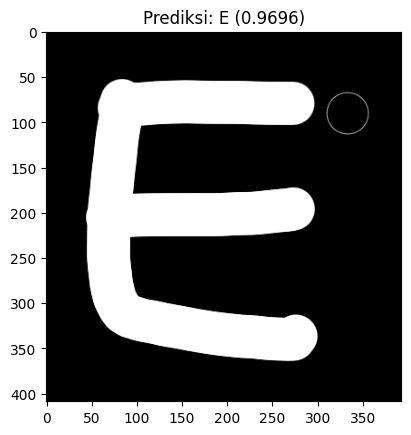

In [91]:
# Langkah 9: Tampilkan gambar yang diupload
img = Image.open(uploaded_image)
plt.imshow(img, cmap='gray')
plt.title(f"Prediksi: {labels[predicted_class]} ({np.max(prediction):.4f})")
plt.show()